# Prueba 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np

In [4]:
# Import the data
file_path = "C:\\Users\\antho\\Delta\\rsim\\tests\\autonomy_tests\\autonomy_test_1.csv"
# Select only timestamps and sound level values
columns_to_select = ["created_at", "field1"]
selected_data = None

try:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Select only the specified columns
    selected_data = df[column_names]

except Exception as e:
    print(f"Error loading data: {e}")

# Parse timestamp column to datetime format
selected_data["created_at"] = pd.to_datetime(selected_data["created_at"], format="%Y-%m-%dT%H:%M:%S-06:00")

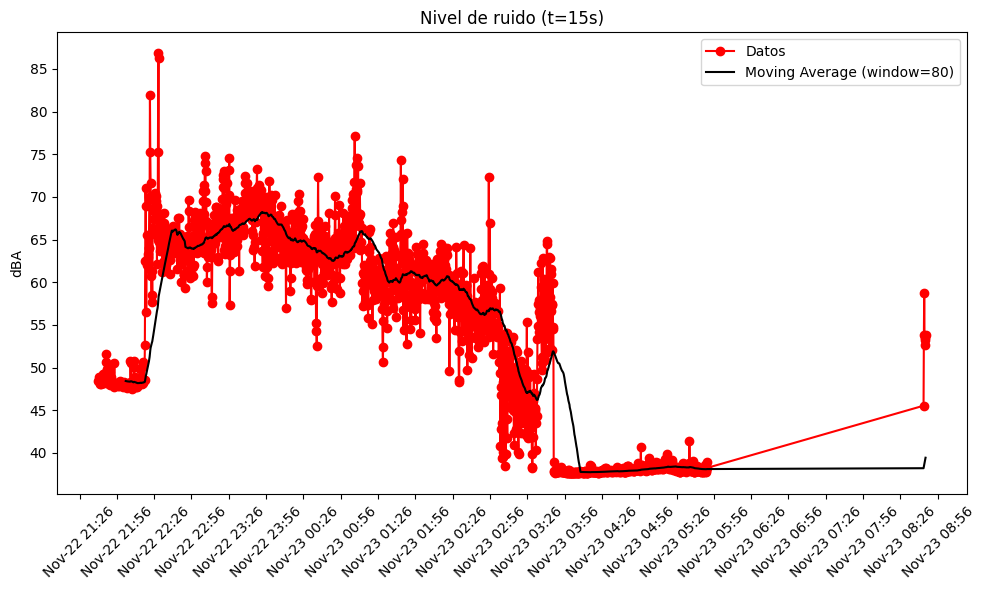

In [5]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(selected_data["created_at"], selected_data["field1"], marker="o", linestyle="-", color="r", label="Datos")
plt.title("Nivel de ruido (t=15s)")
plt.ylabel("dBA")
plt.xticks(rotation=45)

# Set the number of ticks on the y-axis
plt.yticks(np.arange(35, 90, step=5))

# Give datetime formatting to the x axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%d %H:%M"))

# Set locator for the x-axis to show labels every 30 minutes
locator = mdates.MinuteLocator(interval=30)
plt.gca().xaxis.set_major_locator(locator)

# Add a moving average
window = 80
selected_data["Moving_Average"] = selected_data["field1"].rolling(window=window).mean()
plt.plot(selected_data["created_at"], selected_data["Moving_Average"], color="black", label=f"Moving Average (window={window})")

plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout for better spacing
plt.show()